# Lab 7 Tasks

In this notebook we will analyse a dataset from an Irish triathlon by using the Pandas library. In the dataset, each row represents an athlete, described by a number of different descriptive features:

- *Number:* The athlete"s race bib number
- *Place:* The place in which the athlete finished the race
- *AgeCategory:* The athlete"s age category (16-19, 20-29, 30-39, 40-49, or 50+)
- *Gender:* The gender that the athlete declared ("M" or "F")
- *Province:* The Irish province where the athlete comes from (Leinster, Munster, Connacht, Ulster)
- *Swim:* The time taken for the swimming segment of the event (in seconds)
- *T1:* The time taken for the first transition of the event, from cycling to swimming (in seconds)
- *Cycle:* The time taken for the cycling segment of the event (in seconds)
- *T2:* The time taken for the swimming segment of the event, from swimming to running (in seconds)
- *Run:* The time taken for the running segment of the event (in seconds)

## Task 1 - Data Loading and Preparation

Use Python to download a file containing triathlon dataset in CSV format from the URL:

http://mlg.ucd.ie/modules/COMP41680/triathlon.csv

Load the dataset into a Pandas DataFrame, where the row index will be given by the athlete"s bib number. Display the first 20 rows of the DataFrame.

In [219]:
import urllib.request
import pandas as pd
from matplotlib import pyplot as plt

In [220]:
url = "http://mlg.ucd.ie/modules/COMP41680/triathlon.csv"
response = urllib.request.urlopen(url)
response = response.read().decode()
with open("triathlon1.csv", "w") as csvfile:
    csvfile.writelines(response)

In [221]:
df_triathlon = pd.read_csv("triathlon.csv", index_col=0)
df_triathlon.head(20)

,Place,Gender,Age,Province,Swim,T1,Cycle,T2,Run
Number,,,,,,,,,
1,11.0,M,19,Munster,518,64.0,2293.0,42.0,1446.0
2,129.0,M,25,Leinster,1102,124.0,2662.0,47.0,1723.0
3,35.0,M,25,Leinster,693,138.0,2472.0,42.0,1466.0
4,153.0,M,26,Munster,906,318.0,3002.0,62.0,1648.0
5,34.0,M,21,Connacht,566,131.0,2518.0,65.0,1522.0
6,131.0,M,25,Connacht,940,202.0,3083.0,63.0,1381.0
7,169.0,M,23,Leinster,1118,366.0,3114.0,127.0,1674.0
8,95.0,M,22,Leinster,1002,102.0,2449.0,59.0,1756.0
9,97.0,M,29,Ulster,735,213.0,2701.0,66.0,1655.0


The dataset might contain missing values. For instance, some athletes may have registered for the race for never actually. Other athletes might have started the race, but not completed all segments of the triathlon.

From the DataFrame, identify the number of missing values in each column. Then remove any rows which contain missing values (i.e. athletes who did not fullly complete the race). How many rows are remaining?

In [222]:
print(df_triathlon.isnull().sum())
df_triathlon = df_triathlon.dropna()
print(df_triathlon.isnull().sum())

Place       4
Gender      0
Age         0
Province    0
Swim        0
T1          1
Cycle       1
T2          2
Run         6
dtype: int64
Place       0
Gender      0
Age         0
Province    0
Swim        0
T1          0
Cycle       0
T2          0
Run         0
dtype: int64


In [223]:
df_triathlon.shape[0]

182

Add a new column to the DataFrame, called *Finish*, which is the total time taken for the race for each athlete (i.e. Swim + T1 + Cycle + T2 + Run).

In [224]:
df_triathlon["Finish"] = df_triathlon["Swim"] + df_triathlon["T1"] + df_triathlon["Cycle"] + df_triathlon["T2"] + \
                         df_triathlon["Run"]
df_triathlon.head()

,Place,Gender,Age,Province,Swim,T1,Cycle,T2,Run,Finish
Number,,,,,,,,,,
1,11.0,M,19,Munster,518,64.0,2293.0,42.0,1446.0,4363.0
2,129.0,M,25,Leinster,1102,124.0,2662.0,47.0,1723.0,5658.0
3,35.0,M,25,Leinster,693,138.0,2472.0,42.0,1466.0,4811.0
4,153.0,M,26,Munster,906,318.0,3002.0,62.0,1648.0,5936.0
5,34.0,M,21,Connacht,566,131.0,2518.0,65.0,1522.0,4802.0


To verify the step above, sort the DataFrame, based on the *Finish* time, fastest to slowest. Display the top 10 fastest athletes overall:

In [225]:
df_triathlon = df_triathlon.sort_values(by="Finish", ascending=False)
df_triathlon.head(10)

,Place,Gender,Age,Province,Swim,T1,Cycle,T2,Run,Finish
Number,,,,,,,,,,
178,184.0,F,64,Munster,1217,567.0,3443.0,118.0,2543.0,7888.0
119,183.0,M,56,Connacht,1040,234.0,3387.0,119.0,2212.0,6992.0
167,182.0,F,49,Connacht,1283,189.0,3394.0,118.0,2001.0,6985.0
157,181.0,F,34,Leinster,1243,156.0,2937.0,119.0,2412.0,6867.0
101,179.0,M,43,Ulster,1270,208.0,3143.0,122.0,2067.0,6810.0
185,178.0,M,35,Munster,1804,247.0,2720.0,99.0,1735.0,6605.0
128,177.0,M,51,Munster,984,299.0,2864.0,123.0,2287.0,6557.0
145,176.0,F,38,Munster,983,300.0,2864.0,123.0,2286.0,6556.0
58,175.0,M,38,Munster,909,257.0,3103.0,80.0,2172.0,6521.0


## Task 2 - Data Analysis

What is the average finishing time for athletes? What is the slowest finishing time?

In [226]:
print(df_triathlon["Finish"].mean())
print(df_triathlon["Finish"].min())

5359.840659340659
3759.0


On average which segment of the race took the longest: swimming, cycling or running?

In [227]:
df_triathlon[["Swim", "Cycle", "Run"]].mean().max()

2623.285714285714

How many female and male athletes competed in the race? How many athletes from each Irish province competed in the race? 

In [228]:
df_triathlon.value_counts("Gender")

Gender
M    134
F     48
Name: count, dtype: int64

In [229]:
df_triathlon.value_counts("Province")

Province
Leinster    75
Munster     55
Ulster      30
Connacht    22
Name: count, dtype: int64

How many female and male athletes were from each age catgory? How many female and male athletes were from each of the 4 provinces? 

In [230]:
pd.crosstab(df_triathlon["Age"], df_triathlon["Gender"])

Gender,F,M
Age,,
19,0,1
20,2,0
21,4,2
22,0,4
23,0,2
24,2,0
25,2,3
26,1,4
27,0,2


In [231]:
pd.crosstab(df_triathlon["Gender"], df_triathlon["Province"])

Province,Connacht,Leinster,Munster,Ulster
Gender,,,,
F,6,20,16,6
M,16,55,39,24


Create a new column "AgeCategory" that divides the ages into age categories: 16-19, 20-29, 30-39, 40-49, 50-65.

In [232]:
bins = pd.IntervalIndex.from_tuples([(16, 19), (19, 29), (29, 39), (39, 49), (49, 65)])
df_triathlon["AgeCategory"] = pd.cut(df_triathlon["Age"], bins=bins)
df_triathlon.head(200)

,Place,Gender,Age,Province,Swim,T1,Cycle,T2,Run,Finish,AgeCategory
Number,,,,,,,,,,,
178,184.0,F,64,Munster,1217,567.0,3443.0,118.0,2543.0,7888.0,"(49, 65]"
119,183.0,M,56,Connacht,1040,234.0,3387.0,119.0,2212.0,6992.0,"(49, 65]"
167,182.0,F,49,Connacht,1283,189.0,3394.0,118.0,2001.0,6985.0,"(39, 49]"
157,181.0,F,34,Leinster,1243,156.0,2937.0,119.0,2412.0,6867.0,"(29, 39]"
101,179.0,M,43,Ulster,1270,208.0,3143.0,122.0,2067.0,6810.0,"(39, 49]"
...,...,...,...,...,...,...,...,...,...,...,...
118,5.0,M,52,Munster,621,104.0,2169.0,51.0,1322.0,4267.0,"(49, 65]"
92,4.0,M,49,Leinster,621,89.0,2005.0,53.0,1474.0,4242.0,"(39, 49]"
54,3.0,M,35,Ulster,621,85.0,1982.0,53.0,1282.0,4023.0,"(29, 39]"


What were the average times for the three segments, per age category?

In [233]:
df_triathlon.groupby("AgeCategory")[["Swim", "Cycle", "Run"]].mean()

,Swim,Cycle,Run
AgeCategory,,,
"(16, 19]",518.00,2293.000000,1446.000000
"(19, 29]",839.75,2802.031250,1624.625000
"(29, 39]",836.76,2566.346667,1552.840000
"(39, 49]",888.50,2576.611111,1660.277778
"(49, 65]",870.90,2693.350000,1778.500000


## Task 3 - Data Visualisation

Use bar charts to visualise:
1. The number of athletes per age category
2. The number of athletes per province

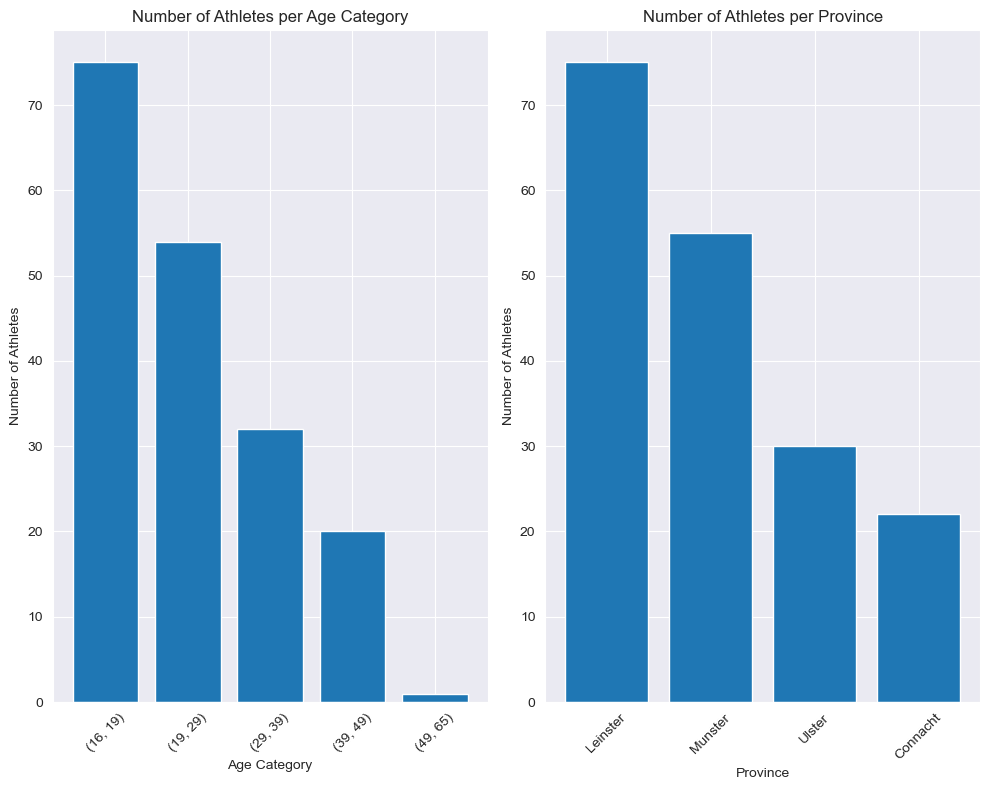

In [234]:
age_counts = df_triathlon["AgeCategory"].value_counts()
province_counts = df_triathlon["Province"].value_counts()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 2, 1)
ax.bar(["(16, 19)", "(19, 29)", "(29, 39)", "(39, 49)", "(49, 65)"], age_counts)
plt.xlabel("Age Category")
plt.ylabel("Number of Athletes")
plt.title("Number of Athletes per Age Category")
plt.xticks(rotation=45)

ax2 = fig.add_subplot(1, 2, 2)
ax2.bar(province_counts.index, province_counts)
plt.xlabel("Province")
plt.ylabel("Number of Athletes")
plt.title("Number of Athletes per Province")
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()

Produce a visualisation of the distribution of finish times:

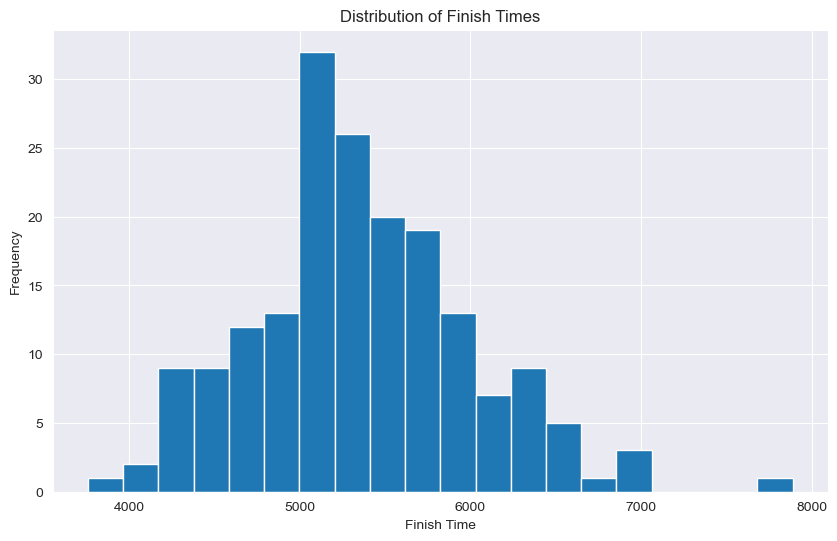

In [235]:
plt.figure(figsize=(10, 6))
plt.hist(df_triathlon["Finish"], bins=20)
plt.xlabel("Finish Time")
plt.ylabel("Frequency")
plt.title("Distribution of Finish Times")
plt.show()

Repeat the above, but this time produce a visualisation of the distribution of finish times for female athletes only:

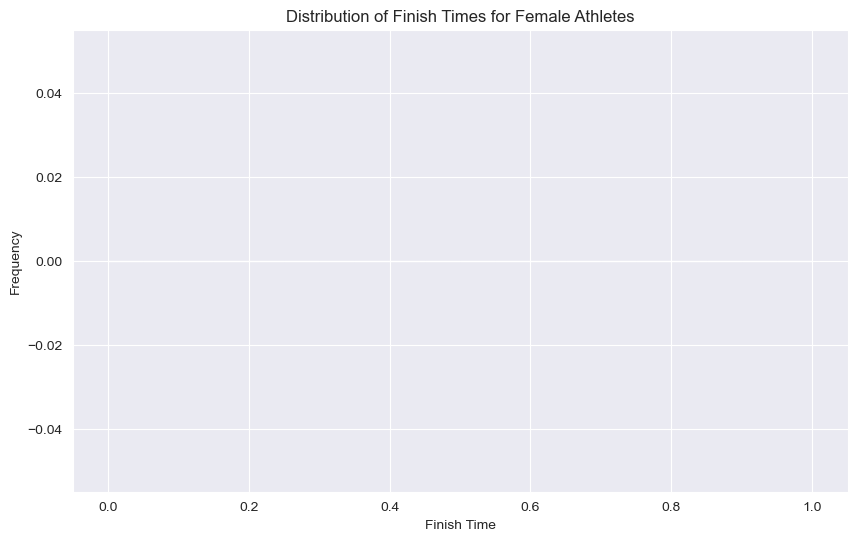

In [236]:
df_female = df_triathlon[df_triathlon["Gender"] == "Female"]

plt.figure(figsize=(10, 6))
plt.hist(df_female["Finish"], bins=20)
plt.xlabel("Finish Time")
plt.ylabel("Frequency")
plt.title("Distribution of Finish Times for Female Athletes")
plt.show()

Produce three plots which show: 
1. The relationship between the time taken for the swimming and cycling segments.
2. The relationship between the time taken for the swimming and running segments.
3. The relationship between the time taken for the cycling and running segments.

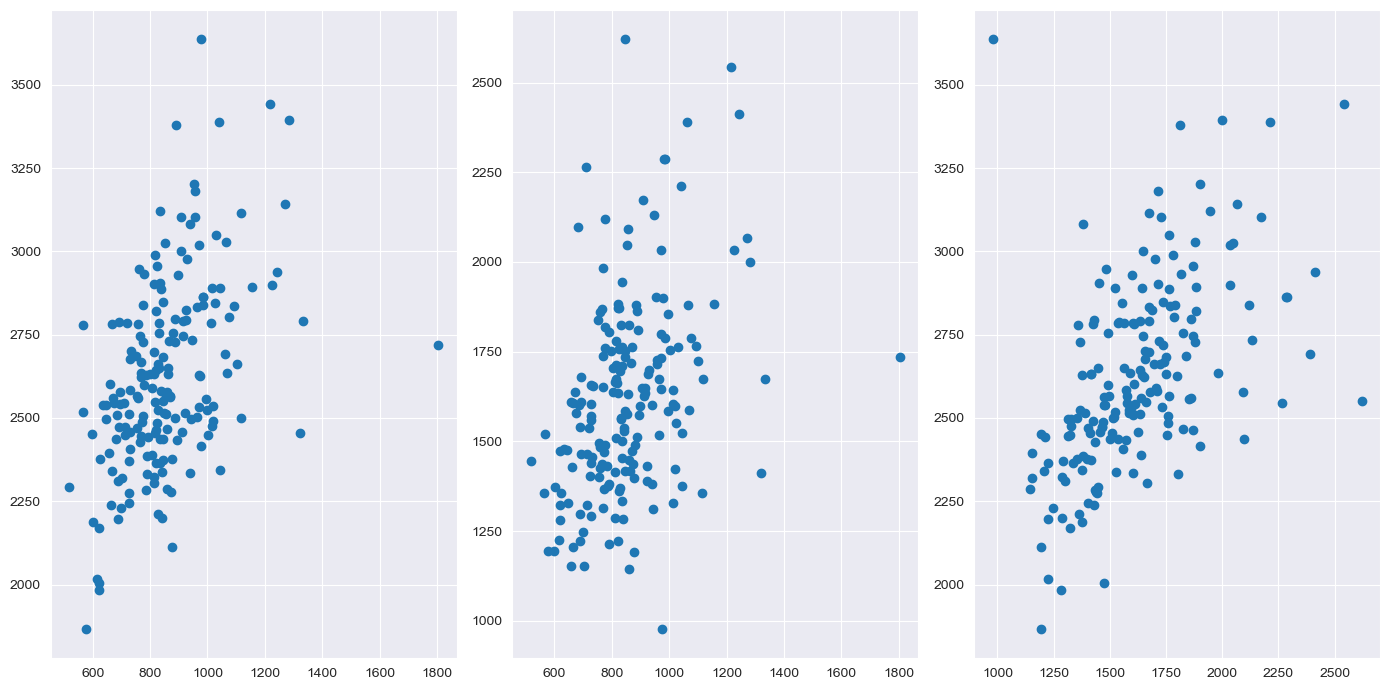

In [239]:
swim = df_triathlon["Swim"]
cycle = df_triathlon["Cycle"]
run = df_triathlon["Run"]

fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(swim, cycle)
ax1 = fig.add_subplot(1, 3, 2)
ax1.scatter(swim, run)
ax1 = fig.add_subplot(1, 3, 3)
ax1.scatter(run, cycle)
fig.tight_layout()
plt.show()